> TOC
```
Step 1. 데이터 불러오기
Step 2. 데이터 분할
     2-1. 시점(2020년) 기준 분할하기
     2-2. 데이터 길이 맞추기
     2-3. 데이터 분포 맞추기(스케일링)
Step 3. 통계 분석
     3-1. 회귀 분석
     3-2. 정규성 검정
     3-3. 상관성 검정
     3-4. 쌍체 검정
```

## Step 1. 데이터 불러오기

In [7]:
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [4]:
stocks = yf.Ticker('TSLA')

In [5]:
df = stocks.history(start='2010-01-01', end='2022-07-08')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500,0,0.0
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500,0,0.0
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700,0,0.0


## Step 2. 데이터 분할

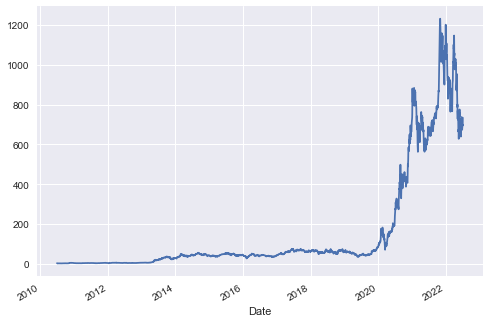

In [10]:
df['Close'].plot()
plt.show()

### 2-1. 시점(2020년) 기준 분할하기

In [19]:
close_before = df['Close'][:'2019']
close_after = df['Close']['2020':]

print(f'[period : ~2019]\n{close_before.describe}')
print('\n')
print(f'[period : 2020~]\n{close_after.describe}')

[period : ~2019]
<bound method NDFrame.describe of Date
2010-06-29     4.778000
2010-06-30     4.766000
2010-07-01     4.392000
2010-07-02     3.840000
2010-07-06     3.222000
                ...    
2019-12-24    85.050003
2019-12-26    86.188004
2019-12-27    86.075996
2019-12-30    82.940002
2019-12-31    83.666000
Name: Close, Length: 2394, dtype: float64>


[period : 2020~]
<bound method NDFrame.describe of Date
2020-01-02     86.052002
2020-01-03     88.601997
2020-01-06     90.307999
2020-01-07     93.811996
2020-01-08     98.428001
                 ...    
2022-06-30    673.419983
2022-07-01    681.789978
2022-07-05    699.200012
2022-07-06    695.200012
2022-07-07    733.630005
Name: Close, Length: 633, dtype: float64>


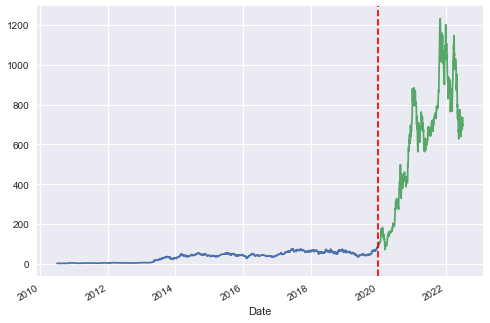

In [29]:
close_before.plot()
close_after.plot()

plt.axvline(x=close_after.index[0], c='red', linestyle='--')

plt.show()

### 2-2. 데이터 길이 맞추기

In [30]:
l = len(close_after)
close_before = close_before.iloc[-l:]

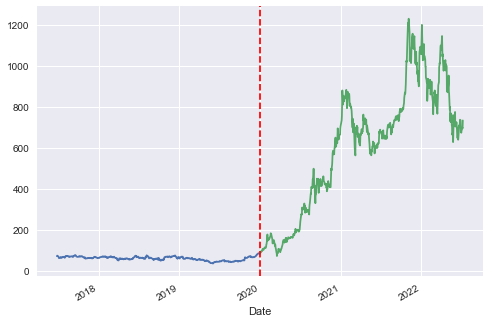

In [31]:
close_before.plot()
close_after.plot()

plt.axvline(x=close_after.index[0], c='red', linestyle='--')

plt.show()

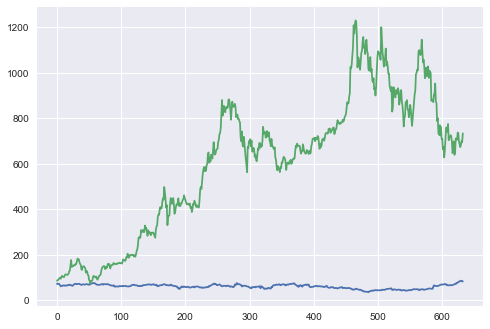

In [40]:
import numpy as np

plt.plot(close_before.values)
plt.plot(close_after.values)

plt.show()

### 2-3. 데이터 분포 맞추기(스케일링)

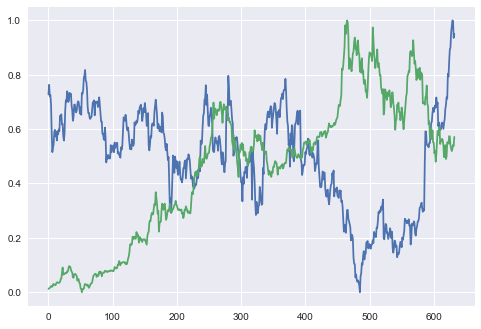

In [48]:
scaled_before = (close_before - np.min(close_before)) / (np.max(close_before) - np.min(close_before))
scaled_after = (close_after - np.min(close_after)) / (np.max(close_after) - np.min(close_after))

plt.plot(scaled_before.values)
plt.plot(scaled_after.values)

plt.show()

## Step 3. 통계 분석

### 3-1. 회귀 분석

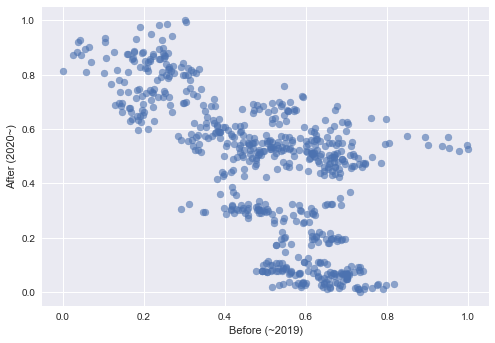

In [60]:
plt.scatter(x=scaled_before.values, y=scaled_after.values, alpha=0.6)
plt.xlabel('Before (~2019)')
plt.ylabel('After (2020~)')
plt.show()

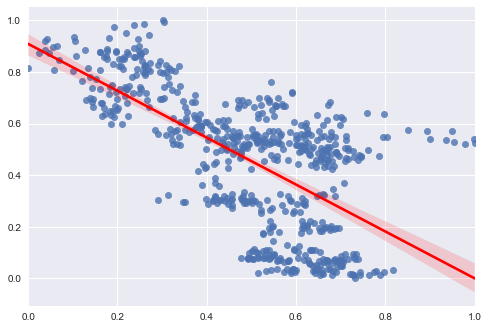

In [67]:
import seaborn as sns

sns.regplot(x=scaled_before.values, y=scaled_after.values, line_kws={"color": "red"})
plt.show()

In [70]:
import statsmodels.api as sm
res = sm.OLS(endog=scaled_before.values, exog=sm.add_constant(scaled_after.values)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           6.66e-76
Time:                        21:55:52   Log-Likelihood:                 337.83
No. Observations:                 633   AIC:                            -671.7
Df Residuals:                     631   BIC:                            -662.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7060      0.011     61.976      0.000       0.684       0.728
x1            -0.4584      0.022    -21.233      0.000      -0.501      -0.416
==============================================================================
Omnibus:                       50.738   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.053
Skew:                           0.671   Prob(JB):                     1.23e-14
Kurtosis:                       3.792   Cond. No.                         4.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 상수항 추가(const), 상수항 : 0.7(p<0.05로 유의)
- 회귀계수 : -0.46(p<0.05로 유의)
- 설명력(R^2) : 0.42


but. 회귀분석은 기본적으로 인과관계 검정을 위한 용도입니다. 시점이 다른 동일 주가에 대해 인과성 검정은 적합하지 않습니다.  

### 3-2. 정규성 검정

정규성 검정은 이후 상관 검정과 쌍체 검정을 위한 사전 작업입니다.

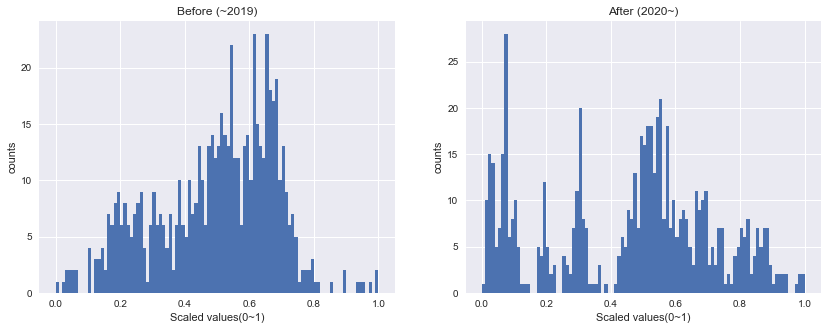

In [83]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.hist(scaled_before.values, bins=100)
plt.title('Before (~2019)')
plt.xlabel('Scaled values(0~1)')
plt.ylabel('counts')

plt.subplot(122)
plt.hist(scaled_after.values, bins=100)
plt.title('After (2020~)')
plt.xlabel('Scaled values(0~1)')
plt.ylabel('counts')
plt.show()

Kolmogorov-Smirnov Test : 

- 귀무가설: 정규분포를 따른다.
- 연구가설: 정규분포를 따르지 않는다.

In [92]:
from scipy import stats

s, p = stats.kstest(scaled_before.values, 'norm')
print(f'[Before (~2019)] stats: {s:.2f} p-value: {p:.2f}')
s, p = stats.kstest(scaled_after.values, 'norm')
print(f'[After (2020~)] stats: {s:.2f} p-value: {p:.2f}')

[Before (~2019)] stats: 0.53 p-value: 0.00
[After (2020~)] stats: 0.50 p-value: 0.00


결론: 귀무가설 기각(p-value<0.05), 둘 다 정규분포를 따르지 않는다.


### 3-3. 상관성 검정

Spearman Test :
- 귀무가설 : 상관관계가 없다.
- 연구가설 : 상관관계가 있다.

In [94]:
c, p = stats.spearmanr(a=scaled_before.values, b=scaled_after.values)
print(f'stats: {c:.2f} p-value: {p:.2f}')

stats: -0.66 p-value: 0.00


결론 : 귀무가설 기각(p-value<0.05), 음(-0.66)의 상관관계가 있다.

### 3-4. 쌍체 검정

Paired-Sample T-Test : 
> 같은 집단 & 다른 시점에 대한 비교
- 귀무가설 : 두 분포는 같은 분포다.
- 연구가설 : 두 분포는 서로 다른 분포다.

In [99]:
t, p = stats.ttest_rel(a=scaled_before.values, b=scaled_after.values)
print(f'stats: {t:.2f} p-value: {p:.2f}')

stats: 2.34 p-value: 0.02


결론: 귀무가설 기각(p-value<0.05), 두 분포는 서로 다른 분포다.